In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
delivery = pd.read_csv('/content/deliveries.csv')

In [3]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [4]:
match=pd.read_csv('/content/matches.csv')
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [5]:
total_score_df = delivery.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()

In [6]:
total_score_df.head()

,match_id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129


In [7]:
total_score_df = total_score_df[total_score_df['inning']==1]

In [8]:
total_score_df.head()

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110


In [9]:
match_df =match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [10]:
match_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110


In [11]:
match_df.shape

(1095, 22)

In [12]:
match_df.tail()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175
1094,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon,1426312,113


In [13]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [14]:
teams =[
    'Sunrisers Hyderabad', 'Mumbai Indians','Royal Challengers Bengaluru','Kolkata Knight Riders','Punjab Kings',
    'Chennai Super Kings', 'Rajasthan Royals', 'Delhi Capitals', 'Lucknow Super Giants','Gujarat Titans','Rising Pune Supergiants'
]
#bangalore to banguluru
#guj lions to titans
#kings xi pun to kings pun
#add lucknow
match_df['team1']=match_df['team1'].str.replace('Rising Pune Supergiant','Rising Pune Supergiants')
match_df['team2']=match_df['team2'].str.replace('Rising Pune Supergiant','Rising Pune Supergiants')
match_df['team1']=match_df['team1'].str.replace('Pune Warriors','Rising Pune Supergiants')
match_df['team2']=match_df['team2'].str.replace('Pune Warriors','Rising Pune Supergiants')
match_df['team1']=match_df['team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team2']=match_df['team2'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team1']=match_df['team1'].str.replace('Gujarat Lions','Gujarat Titans')
match_df['team2']=match_df['team2'].str.replace('Gujarat Lions','Gujarat Titans')
match_df['team1']=match_df['team1'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
match_df['team2']=match_df['team2'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [15]:
match_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110


In [16]:
print(match_df.columns)

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'match_id', 'total_runs'],
      dtype='object')


In [17]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [18]:
delivery_df =match_df.merge(delivery,on='match_id')

In [19]:
match_df.shape

(1067, 4)

In [20]:
delivery_df =delivery_df[delivery_df['inning']==2]

In [21]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN


In [22]:
delivery_df['current_score']=delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [23]:
delivery_df['runs_left'] = delivery_df['total_runs_x']-delivery_df['current_score']+1
delivery_df['balls_left']=120-(delivery_df['over']*6+delivery_df['ball'])

In [24]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,1,222,119
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0,NaN,NaN,NaN,2,221,118
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0,NaN,NaN,NaN,2,221,117
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0,NaN,NaN,NaN,3,220,116
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,4,219,115


In [25]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna(0)
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x : x if x ==0  else 1)

In [26]:
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values

In [27]:
delivery_df['wickets']=10- wickets

In [28]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,NaN,0,0,NaN,NaN,1,222,119,10
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,wides,0,0,NaN,NaN,2,221,118,10
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,0,0,NaN,NaN,2,221,117,10
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,NaN,0,0,NaN,NaN,3,220,116,10
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,NaN,0,0,NaN,NaN,4,219,115,10


In [29]:
delivery_df['crr']=delivery_df.current_score*6/(120-delivery_df.balls_left)
delivery_df['rrr']=delivery_df.runs_left*6/delivery_df.balls_left

In [30]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,0,NaN,NaN,1,222,119,10,6.0,11.193277
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,0,NaN,NaN,2,221,118,10,6.0,11.237288
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,NaN,2,221,117,10,4.0,11.333333
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,0,NaN,NaN,3,220,116,10,4.5,11.379310
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,0,NaN,NaN,4,219,115,10,4.8,11.426087


In [31]:
delivery_df = delivery_df.reset_index()
delivery_df.head()

,index,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
0,124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,...,0,0,NaN,NaN,1,222,119,10,6.0,11.193277
1,125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,...,0,0,NaN,NaN,2,221,118,10,6.0,11.237288
2,126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,...,0,0,NaN,NaN,2,221,117,10,4.0,11.333333
3,127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,...,0,0,NaN,NaN,3,220,116,10,4.5,11.379310
4,128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,...,0,0,NaN,NaN,4,219,115,10,4.8,11.426087


In [32]:
delivery_df.drop(columns='index',inplace=True)

In [33]:
def is_win(df):
    winner = []
    for item,row in df.iterrows():
        if row.winner == row.batting_team:
            winner.append(1)
        else:
            winner.append(0)

    return winner

In [34]:
delivery_df['winner']=is_win(delivery_df)

In [35]:
final_df =delivery_df[['match_id','batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','winner']]

In [36]:
final_df =final_df.sample(final_df.shape[0])

In [37]:
final_df['batting_team']=final_df['batting_team'].str.replace('Rising Pune Supergiant','Rising Pune Supergiants')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Rising Pune Supergiant','Rising Pune Supergiants')
final_df['batting_team']=final_df['batting_team'].str.replace('Pune Warriors','Rising Pune Supergiants')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Pune Warriors','Rising Pune Supergiants')
final_df['batting_team']=final_df['batting_team'].str.replace('Kings XI Punjab','Punjab Kings')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Kings XI Punjab','Punjab Kings')
final_df['batting_team']=final_df['batting_team'].str.replace('Gujarat Lions','Gujarat Titans')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Gujarat Lions','Gujarat Titans')
final_df['batting_team']=final_df['batting_team'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
final_df['batting_team']=final_df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

final_df['batting_team']=final_df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

In [38]:
print(final_df.city.unique())
print(final_df.batting_team.unique())

['Navi Mumbai' 'Ahmedabad' 'Mumbai' 'Cape Town' 'Chandigarh' nan 'Pune'
 'Hyderabad' 'Kolkata' 'Abu Dhabi' 'Bengaluru' 'Bangalore' 'Delhi'
 'Jaipur' 'Sharjah' 'Johannesburg' 'Chennai' 'Mohali' 'Dharamsala'
 'Durban' 'Visakhapatnam' 'Cuttack' 'Centurion' 'Dubai' 'Kanpur' 'Lucknow'
 'Port Elizabeth' 'Rajkot' 'Raipur' 'Ranchi' 'Indore' 'Guwahati'
 'Bloemfontein' 'Nagpur' 'East London' 'Kimberley']
['Mumbai Indians' 'Kolkata Knight Riders' 'Delhi Capitals'
 'Rajasthan Royals' 'Royal Challengers Bengaluru' 'Sunrisers Hyderabad'
 'Rising Pune Supergiants' 'Punjab Kings' 'Chennai Super Kings'
 'Lucknow Super Giants' 'Gujarat Titans']


In [39]:
import random
cities_dict = {
    'Royal Challengers Bengaluru':'Bengaluru',
    'Chennai Super Kings':'Chennai',
    'Punjab Kings':'Mohali',
    'Kolkata Knight Riders':'Kolkata',
    'Delhi Capitals':'Delhi',
    'Rajasthan Royals':'Jaipur',
    'Mumbai Indians':'Mumbai',
    'Sunrisers Hyderabad':'Hyderabad',
    'Lucknow Super Giants':'Lucknow',
    'Gujarat Titans' : 'Ahmedabad',
    'Rising Pune Supergiants' : 'Pune'
}
final_df['city']=final_df['city'].fillna(0)
def fill_city(x):
    if x.city == 0:
        team = [x.batting_team,x.bowling_team][random.randint(0,1)]
        return cities_dict[team]
    else :
        return x.city


final_df['city']=final_df.apply(fill_city,axis=1)

In [40]:
final_df.head(50)

,match_id,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,winner
102452,1304090,Mumbai Indians,Rajasthan Royals,Navi Mumbai,25,18,6,158,7.882353,8.333333,1
14485,419118,Kolkata Knight Riders,Rajasthan Royals,Ahmedabad,42,12,7,168,7.055556,21.000000,0
24331,501246,Delhi Capitals,Mumbai Indians,Mumbai,166,92,6,178,2.785714,10.826087,0
7716,392195,Rajasthan Royals,Punjab Kings,Cape Town,97,67,4,139,4.867925,8.686567,0
2352,336003,Kolkata Knight Riders,Punjab Kings,Chandigarh,111,46,5,178,5.513514,14.478261,0
44375,729281,Royal Challengers Bengaluru,Delhi Capitals,Delhi,51,41,8,145,7.215190,7.463415,1
102701,1304092,Sunrisers Hyderabad,Chennai Super Kings,Pune,46,10,4,202,8.563636,27.600000,0
109645,1359505,Mumbai Indians,Punjab Kings,Mumbai,14,0,4,214,10.050000,inf,0
73762,1136599,Royal Challengers Bengaluru,Sunrisers Hyderabad,Hyderabad,142,114,10,146,5.000000,7.473684,0
70464,1136570,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata,37,36,7,138,7.285714,6.166667,1


In [41]:
final_df.shape

(122787, 11)

In [42]:
final_df.dropna(inplace=True)

In [43]:
final_df =final_df[final_df.balls_left !=0]

In [44]:
from sklearn.model_selection import train_test_split
X = final_df.drop(columns=['winner','match_id'])
y = final_df['winner']
X_copy =final_df.drop(columns=['winner'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [46]:
ohe = OneHotEncoder()
ohe.fit_transform(X.iloc[:,:3])
category = ohe.categories_
trf = ColumnTransformer([
    ('trf',OneHotEncoder(categories=category,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')

In [47]:
pipe = Pipeline([
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
#     ('step2',RandomForestClassifier(n_jobs=-1))
])
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(categories=[array(['Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans',
       'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians',
       'Punjab Kings', 'Rajasthan Royals', 'Rising Pune Supergiants',
       'Royal Challengers Bengaluru', 'Sunrisers Hyderabad'], dtype=object...
       'Delhi', 'Dharamsala', 'Dubai', 'Durban', 'East London',
       'Guwahati', 'Hyderabad', 'Indore', 'Jaipur', 'Johannesburg',
       'Kanpur', 'Kimberley', 'Kolkata', 'Lucknow', 'Mohali', 'Mumbai',
       'Nagpur', 'Navi Mumbai', 'Port Elizabeth', 'Pune', 'Raipur',
       'Rajkot', 'Ranchi', 'Sharjah', 'Visakhapatnam'], dtype=object)],
                                                                drop='first'),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [48]:
y_pred = pipe.predict_proba(X_test)
y_pred

array([[0.07613485, 0.92386515],
       [0.98858497, 0.01141503],
       [0.61468857, 0.38531143],
       ...,
       [0.77348356, 0.22651644],
       [0.13544457, 0.86455543],
       [0.35425674, 0.64574326]])

In [49]:
ohe = OneHotEncoder()
ohe.fit_transform(X.iloc[:,:3])
category = ohe.categories_
trf = ColumnTransformer([
    ('trf',OneHotEncoder(categories=category,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')
pipe = Pipeline([
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
#     ('step2',RandomForestClassifier(n_jobs=-1))
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict_proba(X_test)
for pair in y_pred:
  if pair[0] > 0.5:
    pair[0] = 1
    pair[1] = 0
  else:
    pair[0] = 0
    pair[1] = 1

In [51]:
with open('model.pkl','wb') as f:
    pickle.dump(pipe,f)

In [55]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [56]:
temp_df ,target =match_progression(delivery_df,1426288,pipe)

Target- 201


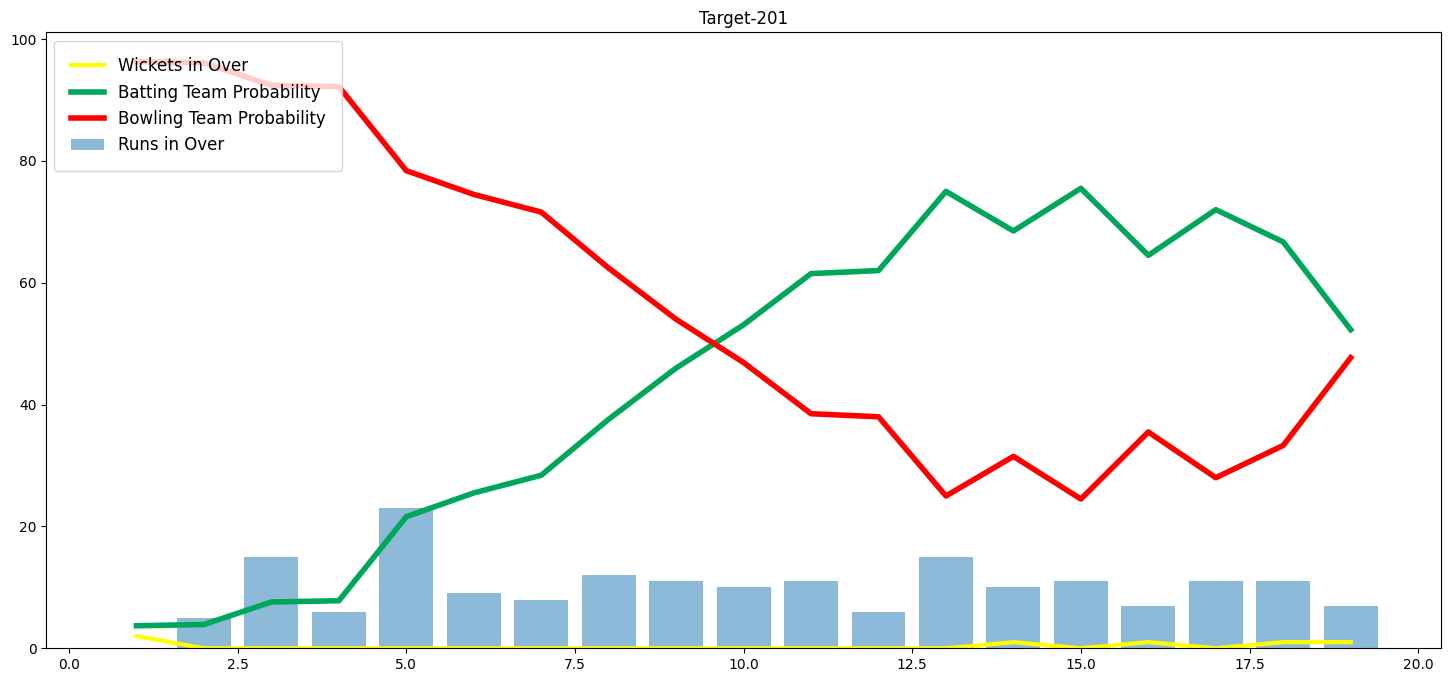

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))

# Plot the lines and assign labels
plt.plot(temp_df['end_of_over'], temp_df['wickets_in_over'], color='yellow', linewidth=3, label='Wickets in Over')
plt.plot(temp_df['end_of_over'], temp_df['win'], color='#00a65a', linewidth=4, label='Batting Team Probability')
plt.plot(temp_df['end_of_over'], temp_df['lose'], color='red', linewidth=4, label='Bowling Team Probability')

# Plot the bar chart
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'], label='Runs in Over', alpha=0.5)

# Add title and legend with increased size
plt.title('Target-' + str(target))
plt.legend(fontsize='large', loc='upper left', frameon=True, borderpad=1)  # Increase font size

# Show the plot
plt.show()


In [58]:
y_pred.shape

(24472, 2)

In [59]:
from sklearn.naive_bayes import GaussianNB

ohe = OneHotEncoder(sparse_output = False)
ohe.fit_transform(X.iloc[:,:3])
category = ohe.categories_
trf = ColumnTransformer([
    ('trf',OneHotEncoder(categories=category,drop='first',sparse_output = False),['batting_team','bowling_team','city'])
],remainder='passthrough')

pipe = Pipeline([
    ('step1',trf),
    ('step2',GaussianNB())
])
pipe.fit(X_train,y_train)

y_pred = pipe.predict_proba(X_test)

for pair in y_pred:
  if pair[0] > 0.5:
    pair[0] = 1
    pair[1] = 0
  else:
    pair[0] = 0
    pair[1] = 1

y_pred = np.where(y_pred[:, 1] > 0.5, 1, 0)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)

# 67% accuracy using naive bayes.

64.50637463223275


In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

ohe = OneHotEncoder(sparse_output=False)
category = ohe.fit(X.iloc[:, :3]).categories_

trf = ColumnTransformer([
    ('trf', OneHotEncoder(categories=category, drop='first', sparse_output=False), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

pipe = Pipeline([
    ('step1', trf),
    ('step2', LinearDiscriminantAnalysis())
])


pipe.fit(X_train, y_train)
y_pred_proba = pipe.predict_proba(X_test)
y_pred = (y_pred_proba[:, 1] > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 80.30%
